### Market Basket Analysis
### Identifying Association Rules

Basically MBA is a technique or algorithm to identify the association rules from your data

<b>Properties</b>
 - Support P(A U B) > A union B meaning A and B go together
 
 Support is how many transactions support the condition. 
 
 
 - Confidence P(B|A) > P(A U B)/P(A) > Product B is sold only when A is sold
 
 confidence is how confident the condition is.
 
 
 - Lift > Confidence/P(B) => P(A U B)/P(A).P(B) 
     
     lift is how often the condition actually happened compared to the estimated chance for that to happen.
     
     if > 1 then the rule is good in predicting, if <1 the rule is not good in predicting
     
     E.g. If P(A) is .4 and P(B) is .7 P(A U B) is .3
     
     Lift = 3/(.4*.7) = 1.071

This will help you to develop your own market basket analysis or association rules application to mine the important rules which are present in the data.

In [31]:
# install.packages('arules')
# install.packages('arulesViz')
library(arulesViz)

In [32]:
# Using groceries dataset
data(Groceries)

In [33]:
# Structure of the groceries dataset
str(Groceries)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


In [34]:
# Inspect the first 5 items in the dataset
inspect(Groceries[1:5])

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}


<b>Each transaction ID has various items in it</b>

In [35]:
# How to process the rules
# Using apriori algorithm
# ?apriori

In [36]:
# Specify the rules to get the default params
gr_rules <- apriori(Groceries)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.03s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


<b> By default, it has given us a confidence of 80% and support of 0.1</b>
 -  By support being 0.1, means we are looking at transactions that have happened atleast 10% of the times

In [37]:
# we can also specify our own parameter
gr_rules <- apriori(Groceries, parameter = list(supp = 0.01, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.02s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [38]:
inspect(gr_rules[1:5])

ERROR: Error in slot(x, s)[i]: subscript out of bounds


In [39]:
# we can also specify our own parameter
# Decrease the support parameter to 0.001
gr_rules <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [40]:
inspect(gr_rules[1:5])

    lhs                        rhs            support     confidence lift     
[1] {liquor,red/blush wine} => {bottled beer} 0.001931876 0.9047619  11.235269
[2] {curd,cereals}          => {whole milk}   0.001016777 0.9090909   3.557863
[3] {yogurt,cereals}        => {whole milk}   0.001728521 0.8095238   3.168192
[4] {butter,jam}            => {whole milk}   0.001016777 0.8333333   3.261374
[5] {soups,bottled beer}    => {whole milk}   0.001118454 0.9166667   3.587512
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


<b>When the lift is > 1 then it is a great rule to consider</b>

In [41]:
gr_rules <- sort(gr_rules, by = "support", decreasing = T)
inspect(gr_rules[1:10])

     lhs                        rhs                    support confidence     lift count
[1]  {citrus fruit,                                                                     
      tropical fruit,                                                                   
      root vegetables,                                                                  
      whole milk}            => {other vegetables} 0.003152008  0.8857143 4.577509    31
[2]  {other vegetables,                                                                 
      curd,                                                                             
      domestic eggs}         => {whole milk}       0.002846975  0.8235294 3.223005    28
[3]  {hamburger meat,                                                                   
      curd}                  => {whole milk}       0.002541942  0.8064516 3.156169    25
[4]  {herbs,                                                                            
      rolls/buns}    

In [45]:
# ?is.redundant

A rule is redundant if a more general rules with the same or a higher confidence exists. That is, a more specific rule is redundant if it is only equally or even less predictive than a more general rule. A rule is more general if it has the same RHS but one or more items removed from the LHS.

returns a logical vector indicating which rules are redundant.

In [43]:
gr_rules

set of 410 rules 

In [44]:
redundant_rules <- is.redundant(gr_rules)
redundant_rules

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[361] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[409] FALSE FALSE

In [46]:
summary(redundant_rules)

   Mode   FALSE    TRUE 
logical     392      18 

In [47]:
# find the rules that are not redundant
gr_rules <- gr_rules [!redundant_rules]
gr_rules

set of 392 rules 

In [49]:
inspect(gr_rules[1:3])

    lhs                   rhs                    support confidence     lift count
[1] {citrus fruit,                                                                
     tropical fruit,                                                              
     root vegetables,                                                             
     whole milk}       => {other vegetables} 0.003152008  0.8857143 4.577509    31
[2] {other vegetables,                                                            
     curd,                                                                        
     domestic eggs}    => {whole milk}       0.002846975  0.8235294 3.223005    28
[3] {hamburger meat,                                                              
     curd}             => {whole milk}       0.002541942  0.8064516 3.156169    25


In [51]:
# How to check a product from the lhs that is associated with other products
# check for beer

gr_rules_beer <- apriori(Groceries, parameter = list(supp = 0.001, conf = .8), appearance = list(default ="rhs", lhs = "bottled beer"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Has zero rules

In [54]:
# How to check a product from the lhs that is associated with other products
# check for milk
# Reduce confidence to 8%

gr_rules_milk <- apriori(Groceries, parameter = list(supp = 0.001, conf = .08), appearance = list(default ="rhs", lhs = "whole milk"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.08    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 done [0.00s].
writing ... [35 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Has generated 35 rules

In [56]:
inspect(gr_rules_milk[1:10])

     lhs    rhs               support    confidence lift count
[1]  {}  => {bottled beer}    0.08052872 0.08052872 1     792 
[2]  {}  => {pastry}          0.08896797 0.08896797 1     875 
[3]  {}  => {citrus fruit}    0.08276563 0.08276563 1     814 
[4]  {}  => {shopping bags}   0.09852567 0.09852567 1     969 
[5]  {}  => {sausage}         0.09395018 0.09395018 1     924 
[6]  {}  => {bottled water}   0.11052364 0.11052364 1    1087 
[7]  {}  => {tropical fruit}  0.10493137 0.10493137 1    1032 
[8]  {}  => {root vegetables} 0.10899847 0.10899847 1    1072 
[9]  {}  => {soda}            0.17437722 0.17437722 1    1715 
[10] {}  => {yogurt}          0.13950178 0.13950178 1    1372 


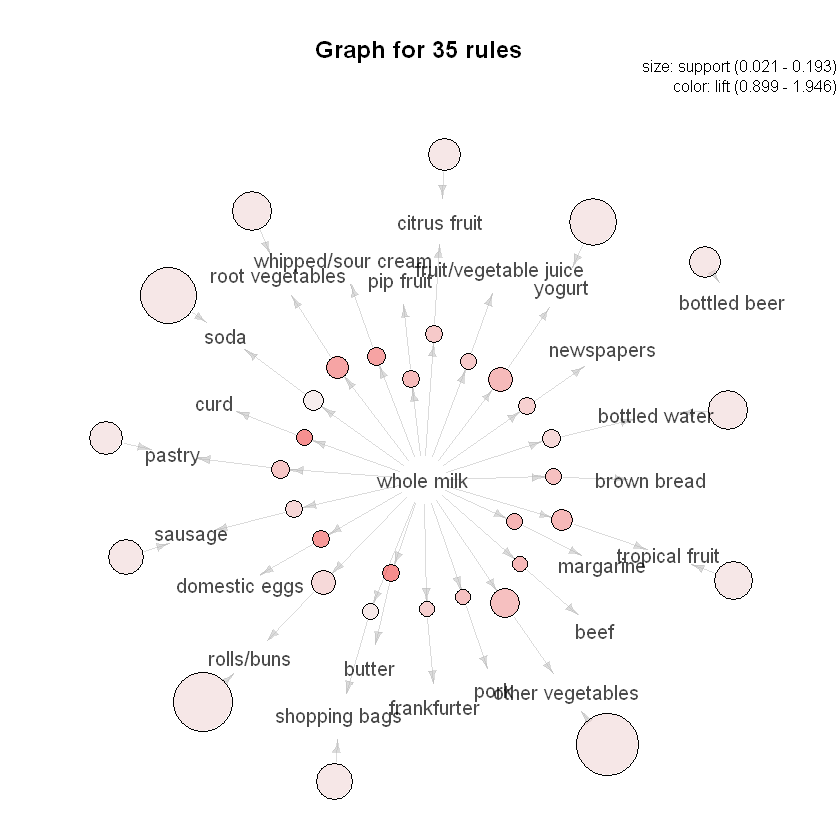

In [63]:
# Visualizsation of rules
plot(gr_rules_milk, method = "graph")